# Import the Python libraries

In [651]:
#Data Analysis Tools
import pandas as pd
import numpy as np
# pd.set_option('display.max_rows', None)
from math import nan

import ast

#Visualizations
import matplotlib as mlp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

## Load data into dataframe

In [623]:
df = pd.read_csv('blackjack_simulator.csv',low_memory=False,nrows=250000)
df.head(10)

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[[10, 11]]",['BJ'],[['S']],1,0,1.5
1,0,411,10,"[5, 5]","[10, 8]",18,"[[5, 5, 11]]",[21],"[['H', 'S']]",-2,0,1.0
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[[3, 10]]",[13],[['S']],-2,0,1.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[[5, 9, 11, 3]]",[18],"[['H', 'H', 'S']]",-1,0,0.0
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[[6, 10, 10]]",[26],[['H']],-1,0,-1.0
5,0,389,7,"[3, 4]","[7, 2, 10]",19,"[[3, 4, 11]]",[18],"[['H', 'S']]",-2,0,-1.0
6,0,383,6,"[3, 3]","[6, 10, 10]",26,"[[3, 2, 10], [3, 4, 5]]","[15, 12]","[['P', 'H', 'S'], ['H', 'S']]",-1,0,2.0
7,0,374,3,"[10, 8]","[3, 10, 7]",20,"[[10, 8]]",[18],[['S']],2,0,-1.0
8,0,369,5,"[8, 10]","[5, 10, 9]",24,"[[8, 10]]",[18],[['S']],1,0,1.0
9,0,364,9,"[6, 8]","[9, 2, 5, 11]",17,"[[6, 8, 6]]",[20],"[['H', 'S']]",0,0,1.0


## Exploratory Data Analysis

In [624]:
df.describe() 

,shoe_id,cards_remaining,dealer_up,run_count,true_count,win
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2056.088164,248.687132,7.294064,0.140380,0.039972,-0.008612
std,1187.510466,98.296702,2.918674,7.956753,2.052510,1.145964
min,0.000000,79.000000,2.000000,-35.000000,-19.000000,-7.000000
25%,1028.000000,163.000000,5.000000,-5.000000,-1.000000,-1.000000
50%,2056.000000,249.000000,8.000000,0.000000,0.000000,0.000000
75%,3085.000000,334.000000,10.000000,5.000000,1.000000,1.000000
max,4113.000000,416.000000,11.000000,36.000000,16.000000,7.000000


In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shoe_id             250000 non-null  int64  
 1   cards_remaining     250000 non-null  int64  
 2   dealer_up           250000 non-null  int64  
 3   initial_hand        250000 non-null  object 
 4   dealer_final        250000 non-null  object 
 5   dealer_final_value  250000 non-null  object 
 6   player_final        250000 non-null  object 
 7   player_final_value  250000 non-null  object 
 8   actions_taken       250000 non-null  object 
 9   run_count           250000 non-null  int64  
 10  true_count          250000 non-null  int64  
 11  win                 250000 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 22.9+ MB


In [626]:
df.isnull().sum()

shoe_id               0
cards_remaining       0
dealer_up             0
initial_hand          0
dealer_final          0
dealer_final_value    0
player_final          0
player_final_value    0
actions_taken         0
run_count             0
true_count            0
win                   0
dtype: int64

In [627]:
df.duplicated().sum()

0

In [628]:
df.shape

(250000, 12)

In [629]:
df.columns

Index(['shoe_id', 'cards_remaining', 'dealer_up', 'initial_hand',
       'dealer_final', 'dealer_final_value', 'player_final',
       'player_final_value', 'actions_taken', 'run_count', 'true_count',
       'win'],
      dtype='object')

### Checking to see the data types per record

In [630]:
for i in df:
    print(f'{i} \nthe data type of that row {type(df[i][0])}')
# Although the hands recordings of the dealer hand and player hand look like lists, they are actually strings.

shoe_id 
the data type of that row <class 'numpy.int64'>
cards_remaining 
the data type of that row <class 'numpy.int64'>
dealer_up 
the data type of that row <class 'numpy.int64'>
initial_hand 
the data type of that row <class 'str'>
dealer_final 
the data type of that row <class 'str'>
dealer_final_value 
the data type of that row <class 'str'>
player_final 
the data type of that row <class 'str'>
player_final_value 
the data type of that row <class 'str'>
actions_taken 
the data type of that row <class 'str'>
run_count 
the data type of that row <class 'numpy.int64'>
true_count 
the data type of that row <class 'numpy.int64'>
win 
the data type of that row <class 'numpy.float64'>


In [631]:
df

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[[10, 11]]",['BJ'],[['S']],1,0,1.5
1,0,411,10,"[5, 5]","[10, 8]",18,"[[5, 5, 11]]",[21],"[['H', 'S']]",-2,0,1.0
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[[3, 10]]",[13],[['S']],-2,0,1.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[[5, 9, 11, 3]]",[18],"[['H', 'H', 'S']]",-1,0,0.0
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[[6, 10, 10]]",[26],[['H']],-1,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,4113,302,3,"[4, 5]","[3, 8, 10]",21,"[[4, 5, 10]]",[19],[['D']],-6,-1,-2.0
249996,4113,296,10,"[2, 6]","[10, 11]",BJ,"[[2, 6]]",[8],[[]],-5,0,-1.0
249997,4113,292,6,"[3, 4]","[6, 10, 6]",22,"[[3, 4, 6]]",[13],"[['H', 'S']]",-5,0,1.0
249998,4113,286,10,"[10, 10]","[10, 11]",BJ,"[[10, 10]]",[20],[[]],-1,0,-1.0


## We will not be using shoe_id, cards_remaining, run_count, true_count

In [632]:
df.drop(columns=['shoe_id', 'cards_remaining','run_count', 'true_count'])

,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,win
0,10,"[10, 11]","[10, 4, 10]",24,"[[10, 11]]",['BJ'],[['S']],1.5
1,10,"[5, 5]","[10, 8]",18,"[[5, 5, 11]]",[21],"[['H', 'S']]",1.0
2,6,"[3, 10]","[6, 6, 10]",22,"[[3, 10]]",[13],[['S']],1.0
3,10,"[5, 9]","[10, 8]",18,"[[5, 9, 11, 3]]",[18],"[['H', 'H', 'S']]",0.0
4,8,"[6, 10]","[8, 2, 10]",20,"[[6, 10, 10]]",[26],[['H']],-1.0
...,...,...,...,...,...,...,...,...
249995,3,"[4, 5]","[3, 8, 10]",21,"[[4, 5, 10]]",[19],[['D']],-2.0
249996,10,"[2, 6]","[10, 11]",BJ,"[[2, 6]]",[8],[[]],-1.0
249997,6,"[3, 4]","[6, 10, 6]",22,"[[3, 4, 6]]",[13],"[['H', 'S']]",1.0
249998,10,"[10, 10]","[10, 11]",BJ,"[[10, 10]]",[20],[[]],-1.0


# Create a new data frame containing the relevant data

In [633]:
df_cleaned = pd.DataFrame()

# Cleaning our data

### Necessary to convert all of these values from strings into actual lists

In [634]:
df_cleaned['initial_hand_list'] = df['initial_hand'].apply(lambda x: ast.literal_eval(x))
df_cleaned['dealer_final_list'] = df['dealer_final'].apply(lambda x: ast.literal_eval(x))
df_cleaned['player_final_list'] = df['player_final'].apply(lambda x: ast.literal_eval(x))
df_cleaned['actions_taken_list'] = df['actions_taken'].apply(lambda x: ast.literal_eval(x))

In [635]:
#Sanity check to check if each value was converted correctly
print(type(df_cleaned['initial_hand_list'][0]), type(df_cleaned['initial_hand_list'][0][0]))

<class 'list'> <class 'int'>


# Update win column to find out if the player won

In [636]:
def win_tie_loss(x):
    if x == 0: # Tie hands
        return -1
    elif x >= 1: # Win hands
        return 1
    else:
        return 0 # Lost hands

In [637]:
df_cleaned['win_bool'] = df['win'].apply(win_tie_loss)

In [638]:
df_cleaned.head()

,initial_hand_list,dealer_final_list,player_final_list,actions_taken_list,win_bool
0,"[10, 11]","[10, 4, 10]","[[10, 11]]",[[S]],1
1,"[5, 5]","[10, 8]","[[5, 5, 11]]","[[H, S]]",1
2,"[3, 10]","[6, 6, 10]","[[3, 10]]",[[S]],1
3,"[5, 9]","[10, 8]","[[5, 9, 11, 3]]","[[H, H, S]]",-1
4,"[6, 10]","[8, 2, 10]","[[6, 10, 10]]",[[H]],0


# Checking to see how are data is distributed

In [639]:
df_cleaned['win_bool'].value_counts(normalize=True) * 100

 0    49.5448
 1    42.0304
-1     8.4248
Name: win_bool, dtype: float64

### Our data is relatively accurate as compared to real blackjack odds
Dealer wins (indicated with 0) 49.54% of the time, 
Player wins (indicated with 1) 42.03% of the time, 
Tie occurs (indicated with -1) 8.42% of the time

In [640]:
df_cleaned['dealer_up'] = df['dealer_up']
df_cleaned['dealer_final_value'] = df['dealer_final_value']
df_cleaned['player_final_value']= df['player_final_value']
df_cleaned

,initial_hand_list,dealer_final_list,player_final_list,actions_taken_list,win_bool,dealer_up,dealer_final_value,player_final_value
0,"[10, 11]","[10, 4, 10]","[[10, 11]]",[[S]],1,10,24,['BJ']
1,"[5, 5]","[10, 8]","[[5, 5, 11]]","[[H, S]]",1,10,18,[21]
2,"[3, 10]","[6, 6, 10]","[[3, 10]]",[[S]],1,6,22,[13]
3,"[5, 9]","[10, 8]","[[5, 9, 11, 3]]","[[H, H, S]]",-1,10,18,[18]
4,"[6, 10]","[8, 2, 10]","[[6, 10, 10]]",[[H]],0,8,20,[26]
...,...,...,...,...,...,...,...,...
249995,"[4, 5]","[3, 8, 10]","[[4, 5, 10]]",[[D]],0,3,21,[19]
249996,"[2, 6]","[10, 11]","[[2, 6]]",[[]],0,10,BJ,[8]
249997,"[3, 4]","[6, 10, 6]","[[3, 4, 6]]","[[H, S]]",1,6,22,[13]
249998,"[10, 10]","[10, 11]","[[10, 10]]",[[]],0,10,BJ,[20]


In [641]:
df_cleaned.dealer_final_list.size

250000

# Unpack the list values of actions_taken_list (Code taken from NURIEL REUVEN https://www.kaggle.com/code/nurielreuven/blackjacks-hands-win-prediction-86-percision)

In [642]:
df_cleaned = df_cleaned.explode(['actions_taken_list','player_final_list'])

In [643]:
def cards_splitter(data,cards,text):
    stopsign = cards.apply(lambda x: len(x))
    for i in range(1,max(stopsign)):
        data[f'{text}{i}'] = cards.apply(lambda x: nan if len(x)<i else x[i-1])

In [644]:
cards_splitter(df_cleaned,df_cleaned['actions_taken_list'],'action_taken_')
cards_splitter(df_cleaned,df_cleaned['player_final_list'],'player_card_')
cards_splitter(df_cleaned,df_cleaned['dealer_final_list'],'dealer_card_')
pd.set_option('display.max_columns', None)
df_cleaned

,initial_hand_list,dealer_final_list,player_final_list,actions_taken_list,win_bool,dealer_up,dealer_final_value,player_final_value,action_taken_1,action_taken_2,action_taken_3,action_taken_4,action_taken_5,action_taken_6,player_card_1,player_card_2,player_card_3,player_card_4,player_card_5,player_card_6,player_card_7,dealer_card_1,dealer_card_2,dealer_card_3,dealer_card_4,dealer_card_5,dealer_card_6,dealer_card_7
0,"[10, 11]","[10, 4, 10]","[10, 11]",[S],1,10,24,['BJ'],S,NaN,NaN,NaN,NaN,NaN,10,11,NaN,NaN,NaN,NaN,NaN,10,4,10.0,NaN,NaN,NaN,NaN
1,"[5, 5]","[10, 8]","[5, 5, 11]","[H, S]",1,10,18,[21],H,S,NaN,NaN,NaN,NaN,5,5,11.0,NaN,NaN,NaN,NaN,10,8,NaN,NaN,NaN,NaN,NaN
2,"[3, 10]","[6, 6, 10]","[3, 10]",[S],1,6,22,[13],S,NaN,NaN,NaN,NaN,NaN,3,10,NaN,NaN,NaN,NaN,NaN,6,6,10.0,NaN,NaN,NaN,NaN
3,"[5, 9]","[10, 8]","[5, 9, 11, 3]","[H, H, S]",-1,10,18,[18],H,H,S,NaN,NaN,NaN,5,9,11.0,3.0,NaN,NaN,NaN,10,8,NaN,NaN,NaN,NaN,NaN
4,"[6, 10]","[8, 2, 10]","[6, 10, 10]",[H],0,8,20,[26],H,NaN,NaN,NaN,NaN,NaN,6,10,10.0,NaN,NaN,NaN,NaN,8,2,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,"[4, 5]","[3, 8, 10]","[4, 5, 10]",[D],0,3,21,[19],D,NaN,NaN,NaN,NaN,NaN,4,5,10.0,NaN,NaN,NaN,NaN,3,8,10.0,NaN,NaN,NaN,NaN
249996,"[2, 6]","[10, 11]","[2, 6]",[],0,10,BJ,[8],NaN,NaN,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,10,11,NaN,NaN,NaN,NaN,NaN
249997,"[3, 4]","[6, 10, 6]","[3, 4, 6]","[H, S]",1,6,22,[13],H,S,NaN,NaN,NaN,NaN,3,4,6.0,NaN,NaN,NaN,NaN,6,10,6.0,NaN,NaN,NaN,NaN
249998,"[10, 10]","[10, 11]","[10, 10]",[],0,10,BJ,[20],NaN,NaN,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN,10,11,NaN,NaN,NaN,NaN,NaN


# For this code we will not be considering splitting hands

### Dropped the values that contain a split or P action

In [645]:
condition = df_cleaned['action_taken_1'] == 'P'
condition2 = df_cleaned['action_taken_2'] == 'P'
condition3 = df_cleaned['action_taken_3'] == 'P'
condition4 = df_cleaned['action_taken_4'] == 'P'
df_cleaned = df_cleaned.drop(df_cleaned[condition|condition2|condition3|condition4].index)

### Replace all of the 'BJ' to 21 to work with integer values

In [646]:
df_cleaned.player_final_value = df_cleaned.player_final_value.str.replace('\[', '',regex = True).replace('\]', '',regex = True).replace('\'BJ\'','21',regex = True)
df_cleaned.dealer_final_value = df_cleaned.dealer_final_value.str.replace('BJ','21')
df_cleaned['player_final_value'] = df_cleaned['player_final_value'].astype(int)
df_cleaned['dealer_final_value'] = df_cleaned['dealer_final_value'].astype(int)
df_cleaned

,initial_hand_list,dealer_final_list,player_final_list,actions_taken_list,win_bool,dealer_up,dealer_final_value,player_final_value,action_taken_1,action_taken_2,action_taken_3,action_taken_4,action_taken_5,action_taken_6,player_card_1,player_card_2,player_card_3,player_card_4,player_card_5,player_card_6,player_card_7,dealer_card_1,dealer_card_2,dealer_card_3,dealer_card_4,dealer_card_5,dealer_card_6,dealer_card_7
0,"[10, 11]","[10, 4, 10]","[10, 11]",[S],1,10,24,21,S,NaN,NaN,NaN,NaN,NaN,10,11,NaN,NaN,NaN,NaN,NaN,10,4,10.0,NaN,NaN,NaN,NaN
1,"[5, 5]","[10, 8]","[5, 5, 11]","[H, S]",1,10,18,21,H,S,NaN,NaN,NaN,NaN,5,5,11.0,NaN,NaN,NaN,NaN,10,8,NaN,NaN,NaN,NaN,NaN
2,"[3, 10]","[6, 6, 10]","[3, 10]",[S],1,6,22,13,S,NaN,NaN,NaN,NaN,NaN,3,10,NaN,NaN,NaN,NaN,NaN,6,6,10.0,NaN,NaN,NaN,NaN
3,"[5, 9]","[10, 8]","[5, 9, 11, 3]","[H, H, S]",-1,10,18,18,H,H,S,NaN,NaN,NaN,5,9,11.0,3.0,NaN,NaN,NaN,10,8,NaN,NaN,NaN,NaN,NaN
4,"[6, 10]","[8, 2, 10]","[6, 10, 10]",[H],0,8,20,26,H,NaN,NaN,NaN,NaN,NaN,6,10,10.0,NaN,NaN,NaN,NaN,8,2,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,"[4, 5]","[3, 8, 10]","[4, 5, 10]",[D],0,3,21,19,D,NaN,NaN,NaN,NaN,NaN,4,5,10.0,NaN,NaN,NaN,NaN,3,8,10.0,NaN,NaN,NaN,NaN
249996,"[2, 6]","[10, 11]","[2, 6]",[],0,10,21,8,NaN,NaN,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,10,11,NaN,NaN,NaN,NaN,NaN
249997,"[3, 4]","[6, 10, 6]","[3, 4, 6]","[H, S]",1,6,22,13,H,S,NaN,NaN,NaN,NaN,3,4,6.0,NaN,NaN,NaN,NaN,6,10,6.0,NaN,NaN,NaN,NaN
249998,"[10, 10]","[10, 11]","[10, 10]",[],0,10,21,20,NaN,NaN,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN,10,11,NaN,NaN,NaN,NaN,NaN


In [647]:
df_cleaned[df_cleaned['dealer_up'] == 11]

,initial_hand_list,dealer_final_list,player_final_list,actions_taken_list,win_bool,dealer_up,dealer_final_value,player_final_value,action_taken_1,action_taken_2,action_taken_3,action_taken_4,action_taken_5,action_taken_6,player_card_1,player_card_2,player_card_3,player_card_4,player_card_5,player_card_6,player_card_7,dealer_card_1,dealer_card_2,dealer_card_3,dealer_card_4,dealer_card_5,dealer_card_6,dealer_card_7
30,"[6, 5]","[11, 11, 3, 6]","[6, 5, 8]","[N, D]",0,11,21,19,N,D,NaN,NaN,NaN,NaN,6,5,8.0,NaN,NaN,NaN,NaN,11,11,3.0,6.0,NaN,NaN,NaN
40,"[3, 10]","[11, 10]","[3, 10]",[N],0,11,21,13,N,NaN,NaN,NaN,NaN,NaN,3,10,NaN,NaN,NaN,NaN,NaN,11,10,NaN,NaN,NaN,NaN,NaN
67,"[7, 8]","[11, 10]","[7, 8]",[N],0,11,21,15,N,NaN,NaN,NaN,NaN,NaN,7,8,NaN,NaN,NaN,NaN,NaN,11,10,NaN,NaN,NaN,NaN,NaN
72,"[8, 10]","[11, 11, 10, 8]","[8, 10]","[N, S]",0,11,20,18,N,S,NaN,NaN,NaN,NaN,8,10,NaN,NaN,NaN,NaN,NaN,11,11,10.0,8.0,NaN,NaN,NaN
82,"[11, 10]","[11, 9]","[11, 10]","[N, S]",1,11,20,21,N,S,NaN,NaN,NaN,NaN,11,10,NaN,NaN,NaN,NaN,NaN,11,9,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249926,"[10, 11]","[11, 11, 10, 5]","[10, 11]","[N, S]",1,11,17,21,N,S,NaN,NaN,NaN,NaN,10,11,NaN,NaN,NaN,NaN,NaN,11,11,10.0,5.0,NaN,NaN,NaN
249933,"[6, 3]","[11, 10]","[6, 3]",[N],0,11,21,9,N,NaN,NaN,NaN,NaN,NaN,6,3,NaN,NaN,NaN,NaN,NaN,11,10,NaN,NaN,NaN,NaN,NaN
249951,"[10, 2]","[11, 2, 10, 6]","[10, 2, 10]","[N, H]",0,11,19,22,N,H,NaN,NaN,NaN,NaN,10,2,10.0,NaN,NaN,NaN,NaN,11,2,10.0,6.0,NaN,NaN,NaN
249965,"[4, 8]","[11, 10]","[4, 8]",[N],0,11,21,12,N,NaN,NaN,NaN,NaN,NaN,4,8,NaN,NaN,NaN,NaN,NaN,11,10,NaN,NaN,NaN,NaN,NaN


In [648]:
df_cleaned.groupby(['dealer_up','win_bool']).size()

dealer_up  win_bool
2          -1           1132
            0           8326
            1           9205
3          -1           1098
            0           7993
            1           9275
4          -1            968
            0           7893
            1           9733
5          -1            924
            0           7566
            1           9902
6          -1            878
            0           7342
            1          10247
7          -1           1825
            0           7551
            1           9449
8          -1           1853
            0           8630
            1           8604
9          -1           1858
            0           9412
            1           7439
10         -1           8144
            0          43492
            1          24054
11         -1           1546
            0          13072
            1           4388
dtype: int64

<AxesSubplot:>

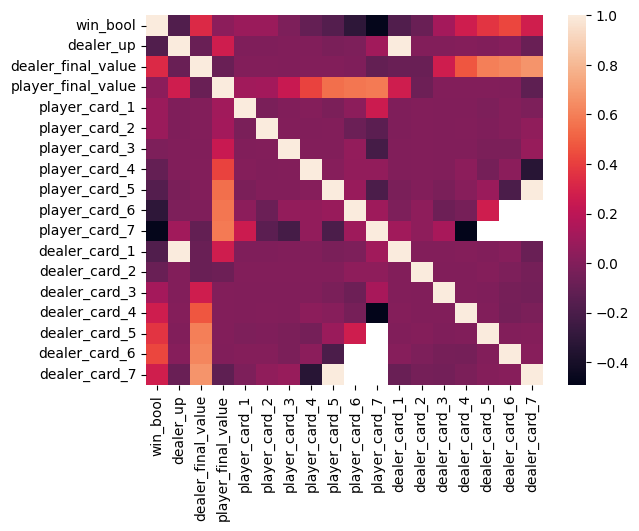

In [650]:
corr = df_cleaned.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)